In [1]:
import numpy as np, os, pickle
import pandas as pd
import matplotlib.pyplot as plt
import re

## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
#Load the train set
file_name  = r'/content/drive/My Drive//Final_Project_Machine_Learning/train_set.zip'
train_data=pd.read_pickle(file_name)


In [4]:
#Load the test set
file_name  = r'/content/drive/My Drive//Final_Project_Machine_Learning/test_set.zip'
test_data=pd.read_pickle(file_name)


In [5]:
frames = [train_data, test_data]
total_data = pd.concat(frames)

In [6]:
total_data.head()

,obfuscated_bool,js,obfuscator_name,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,num_alpha,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",obfuscator_io,4138,1057,178,0,8,0,56,37,2404,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,0,49232,8591,867,25,29,1248,229,398,33518,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",0,30618,6448,2,4,1,10,327,2,19956,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",obfuscator_io,1295,267,74,0,6,0,19,12,792,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",jfogs,14673,1767,800,15,4,2,334,221,8581,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062


# Data Exploration

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187550 entries, 115028 to 19293
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   obfuscated_bool    187550 non-null  object 
 1   js                 187550 non-null  object 
 2   obfuscator_name    187550 non-null  object 
 3   js_length          187550 non-null  int64  
 4   num_spaces         187550 non-null  int64  
 5   num_parenthesis    187550 non-null  int64  
 6   num_slash          187550 non-null  int64  
 7   num_plus           187550 non-null  int64  
 8   num_point          187550 non-null  int64  
 9   num_comma          187550 non-null  int64  
 10  num_semicolon      187550 non-null  int64  
 11  num_alpha          187550 non-null  int64  
 12  num_numeric        187550 non-null  int64  
 13  ratio_spaces       187550 non-null  float64
 14  ratio_alpha        187550 non-null  float64
 15  ratio_numeric      187550 non-null  float64
 16

In [9]:
#Converting the boolean parameter obfuscated_bool into an integer
total_data['obfuscated_bool'] = total_data.obfuscated_bool.apply(lambda x: int(x))

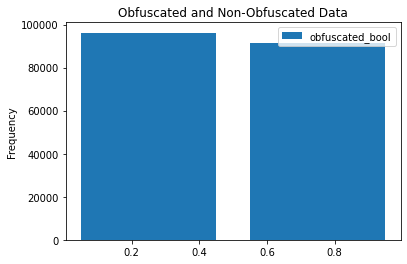

In [10]:
#We have about the same amount of data in each category. A bit less entries are obfuscated but it is not significant.
total_data[['obfuscated_bool']].plot(kind='hist',bins=2,rwidth=0.8)
plt.title('Obfuscated and Non-Obfuscated Data')
plt.show()

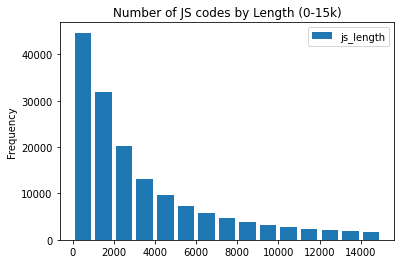

In [11]:
#We see there are much more smaller codes than bigger ones. Note that many JS codes are bigger than 15k characters and do not display here.
total_data[['js_length']].plot(kind='hist',bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000],rwidth=0.8)
plt.title('Number of JS codes by Length (0-15k)')
plt.show()

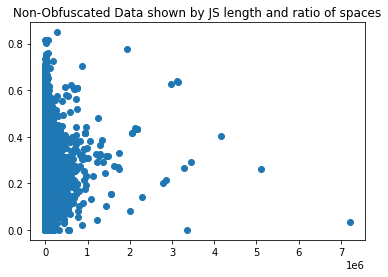

In [12]:
#Looking at the length of JS codes and their ratio of spaces in the non-obfuscated items doesn't show patterns
x = total_data[total_data['obfuscator_name'] == 0].js_length
y = total_data[total_data['obfuscator_name'] == 0].ratio_spaces
plt.scatter(x, y)
plt.title('Non-Obfuscated Data shown by JS length and ratio of spaces')
plt.show()

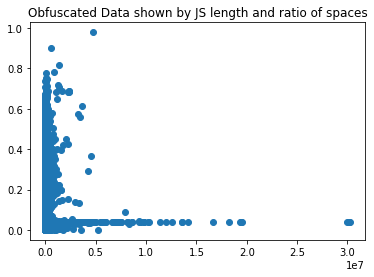

In [13]:
#Looking at the length of JS codes and their ratio of spaces in the obfuscated items shows that most codes are closer to the edges of the graph
x = total_data[total_data['obfuscator_name'] != 0].js_length
y = total_data[total_data['obfuscator_name'] != 0].ratio_spaces
plt.scatter(x, y)
plt.title('Obfuscated Data shown by JS length and ratio of spaces')
plt.show()

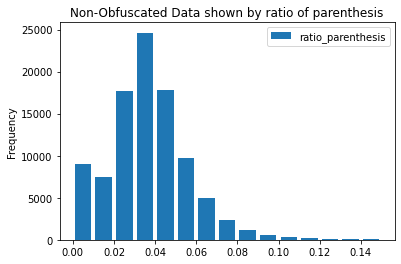

In [14]:
total_data[total_data['obfuscator_name'] == 0][['ratio_parenthesis']].plot(kind='hist',bins=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],rwidth=0.8)
plt.title('Non-Obfuscated Data shown by ratio of parenthesis')
plt.show()

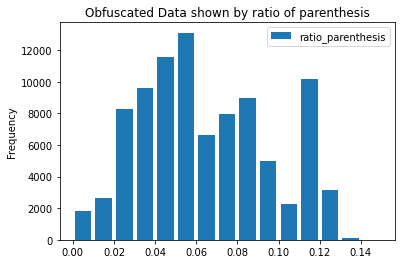

In [15]:
total_data[total_data['obfuscator_name'] != 0][['ratio_parenthesis']].plot(kind='hist',bins=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],rwidth=0.8)
plt.title('Obfuscated Data shown by ratio of parenthesis')
plt.show()

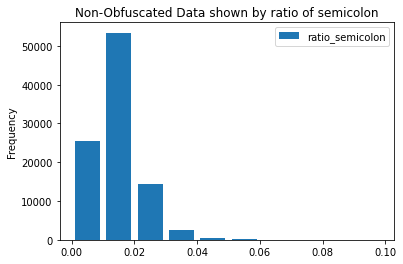

In [16]:
total_data[total_data['obfuscator_name'] == 0][['ratio_semicolon']].plot(kind='hist',bins=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1],rwidth=0.8)
plt.title('Non-Obfuscated Data shown by ratio of semicolon')
plt.show()

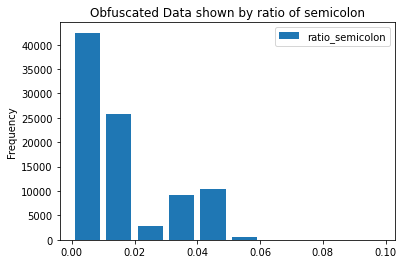

In [17]:
total_data[total_data['obfuscator_name'] != 0][['ratio_semicolon']].plot(kind='hist',bins=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1],rwidth=0.8)
plt.title('Obfuscated Data shown by ratio of semicolon')
plt.show()